In [2]:
using CSV
using Distributions
using Plots

In [ ]:
# (a)

In [3]:
s = CSV.read("MSFT_stock.csv")[2]
r = log.(s[i] / s[i-1] for i in 2:size(s)[1])

8717-element Array{Float64,1}:
  0.03508919172532374
  0.017103186135781795
 -0.025760730735814124
 -0.017543245853564322
 -0.026905784694548112
 -0.027649769562807076
 -0.02843607191576385
  0.019046940981703255
  0.027906993414500002
  0.01818117650810043
 -0.009049269425732831
 -0.009131907082367595
  0.00913190708236767
  ⋮
  0.022530842369569027
  0.007764957603369011
 -0.010463292079081211
  0.014703715764070322
  0.010076032903392112
 -0.029955684797830232
  0.02011735957623063
 -0.02147624353162778
  0.018858489052111377
  0.0035679493280622644
  0.024532743759769757
  0.025572611488303927

In [209]:
r̄ = mean(r)

0.0008868566305898707

In [5]:
sᵣ² = var(r)

0.0004675170547290336

In [ ]:
# (b)

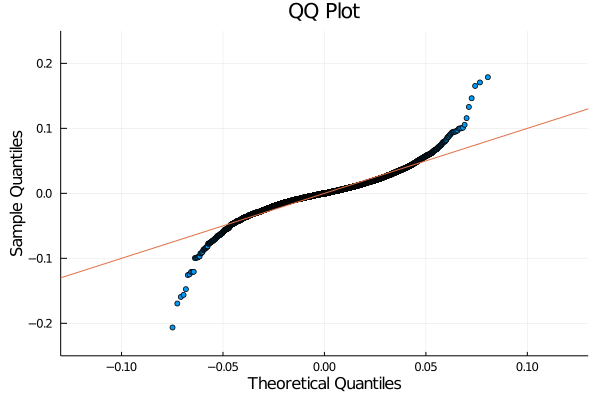

In [64]:
n = size(r)[1]
theo_Q = quantile.(Normal(r̄, sqrt(sᵣ²)), [i / (n + 1) for i in 1:n])
samp_Q = sort(r)

plot(theo_Q, samp_Q, seriestype = :scatter, title = "QQ Plot", 
     markersize = 3, legend = false, xlims = (-0.13, 0.13), ylims = (-0.25, 0.25),
     xlabel = "Theoretical Quantiles", ylabel = "Sample Quantiles")
plot!(x -> x)

In [65]:
savefig("qq")

In [ ]:
# (b)

In [ ]:
df = CSV.read("AB_2020.csv")
A = df[df[:landing_page] .== "A", end]
B = df[df[:landing_page] .== "B", end]
n, m = size(A)[1], size(B)[1]

In [191]:
p̂ᴬ = mean(A)

0.1204794729871982

In [192]:
p̂ᴮ = mean(B)

0.1188495364868077

In [162]:
# (c)

In [ ]:
p̂ = mean([A; B])

In [195]:
t = (p̂ᴬ - p̂ᴮ) / sqrt(p̂ * (1 - p̂) * (1/n + 1/m))

1.362602512273659

In [ ]:
# (b)

In [ ]:
df = CSV.read("traffic.csv")
X = df[df[:weather_main] .== "Clear", end]
Y = df[df[:weather_main] .== "Rain", end]
n, m = size(X)[1], size(Y)[1]
Sₚ = (n - 1) * var(X) + (m - 1) * var(Y)
Sₚ /= n + m - 2
Sₚ = sqrt(Sₚ)

In [243]:
t = mean(X) - mean(Y)
t /= Sₚ * sqrt(1/n + 1/m)

-8.328589157910267

In [ ]:
# (c)

In [245]:
t = mean(X) - mean(Y)
t /= sqrt(var(X)/n + var(Y)/m)

-8.336873582326676

In [ ]:
# (d)

In [249]:
t = var(X) / var(Y)

1.0049224336665912

In [259]:
quantile.(FDist(13390, 5671), [0.025,0.975])

2-element Array{Float64,1}:
 0.9572211255062762
 1.0451043846031538